In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
import skimage
from skimage.transform import resize
from pathlib import Path
import os
import matplotlib.image as mpimg

## 1. Preprocessing (resizing and from img to arrays)

In [ ]:
#1. load data
root = "/Users/xinyuchen/Desktop/Fall2023 &Spr24/Spring 2024/CS 109B/CS 109B project proposals/COVID-detection-from-XRay/Data/"
path = os.path.join(root,"Brixia/dicom_clean_png")

img_size = 224 #img size to resize to

df_train_img = list(Path(path).glob("*.png"))
    #tested on one image to see #df_train_img = list(Path(path).glob("10496945206307687790.dcm.png"))

#2. convert images to numpy array
df_train_np = np.empty((len(df_train_img), img_size, img_size, 1), dtype=np.float32)
mpimg.imread(df_train_img[0])

print("image dimension BEFORE resizing (height, width, channel): ", df_train_np.shape[1:])
#3. resize images 
for i, img_name in enumerate(df_train_img):
    try:
        temp_image = mpimg.imread(img_name)
        img_resize = resize(temp_image, (img_size, img_size, 1), anti_aliasing=True)
        df_train_np[i] = img_resize
    except:
        continue
print(df_train_np.shape)

#4. save processed images
np.save(os.path.join(root,"Brixia images size 224 arrays"), df_train_np, allow_pickle=False, fix_imports=False)

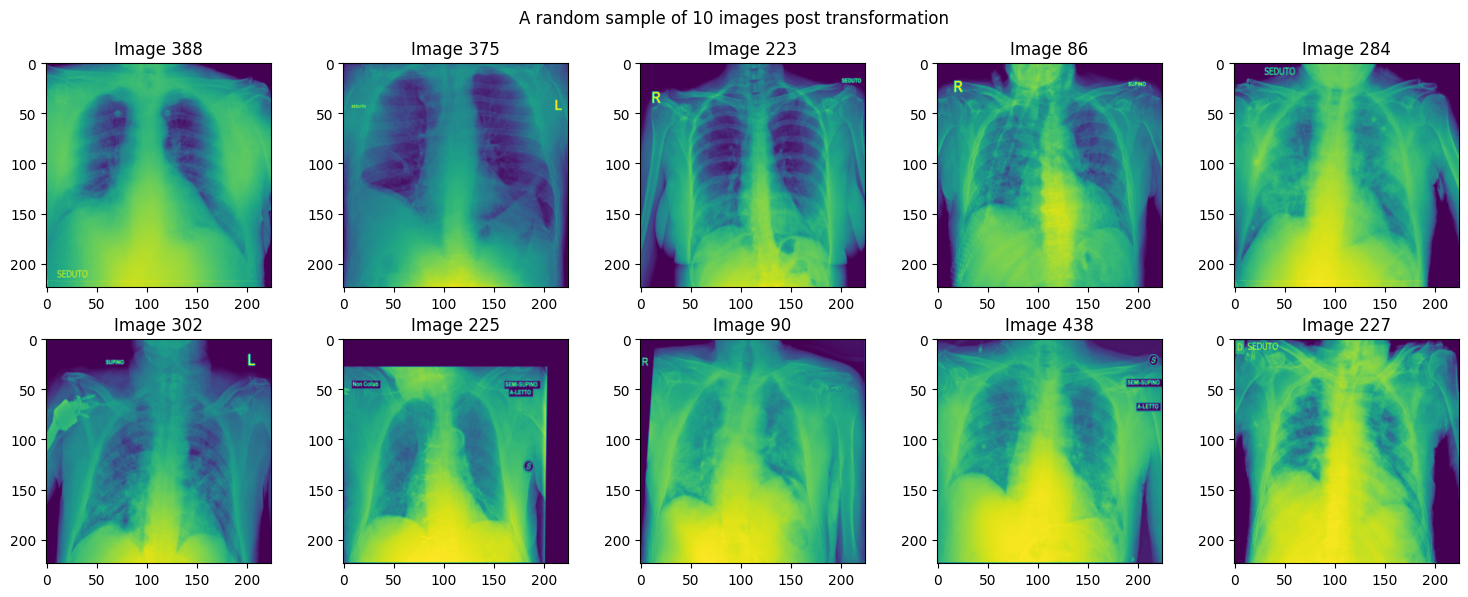

In [76]:
#5. look at a sample from the data, now in numpy format, no longer img format
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

# plot 10 random samples
num = 10
indx = np.random.choice(len(df_train_np)-1, num, replace=False)
for i in range(num):
    axs[i].imshow(df_train_np[i,:,:,:])
    axs[i].set_title(f'Image {indx[i]+1}')

# Adjust layout to prevent overlap
plt.suptitle("A random sample of 10 images post transformation")
plt.tight_layout()

# Show the plot
plt.show()


## 2. EDA

In [5]:
#load data preprocessed above
root = "/Users/xinyuchen/Desktop/Fall2023 &Spr24/Spring 2024/CS 109B/CS 109B project proposals/COVID-detection-from-XRay/Data/"
preprocessed_path = os.path.join(root,"Brixia/Brixia images size 224 arrays.npy")
df_train = np.load(preprocessed_path)


In [6]:
## DATA SIZE

# number of samples
print("number of samples (Brixia only has covid positive): ", df_train.shape[0])
# Image dimension 
print("image dimension (height, width, channel): ", df_train.shape[1:])
# Image data type
print("image data type: ", df_train.dtype)

number of samples (Brixia only has covid positive):  469
image dimension (height, width, channel):  (224, 224, 1)
image data type:  float32


In [10]:
np.argmax(np.mean(df_train, axis=(1,2,3)))

202

average image intensity:  0.53036904
maximum image intensity:  0.69281775
minimum image intensity:  0.28426707
standard of image intensity:  0.07222104


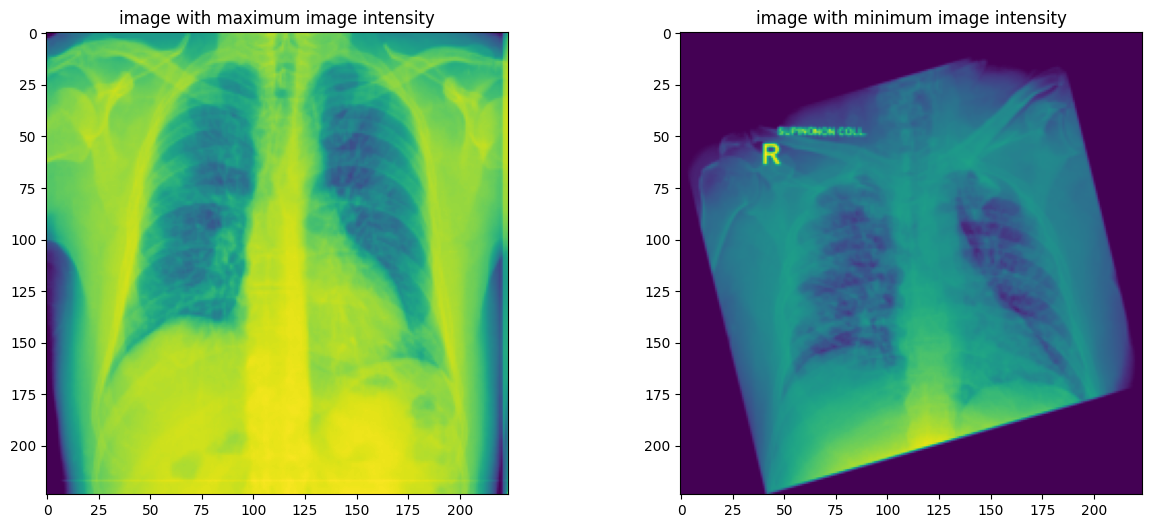

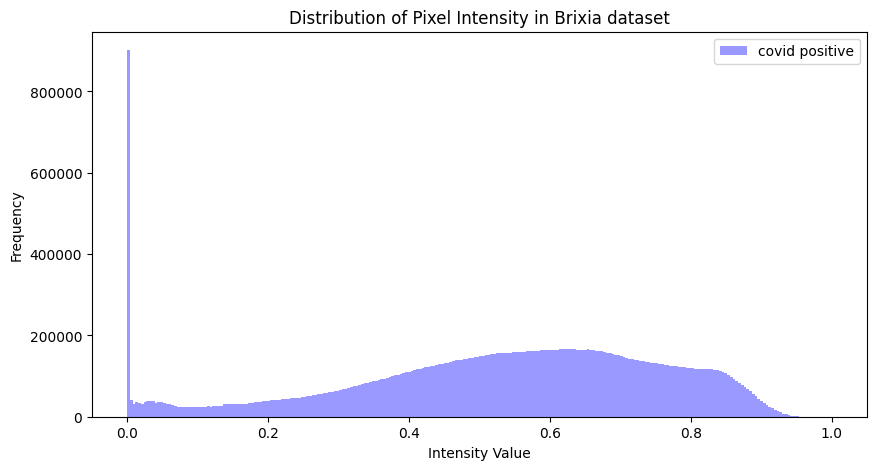

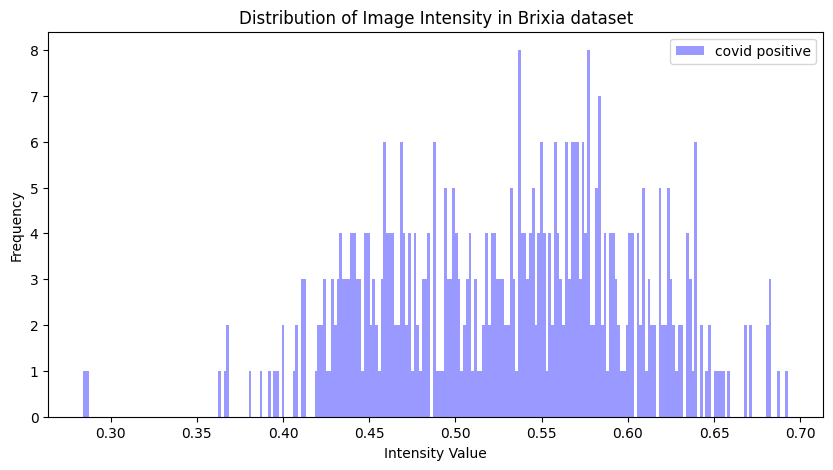

with min intensity of 0.2842670679092407 and max intensity of 0.692817747592926, 
 there are no outliers in this dataset


In [12]:
##IMAGE INTENSITY

# Average image intensity (compare between samples)
print("average image intensity: ", np.mean(np.mean(df_train, axis=(1,2,3)))) #== np.mean(df_train)
# Maximum image intensity 
max_intensity= np.max(np.mean(df_train, axis=(1,2,3)))
print("maximum image intensity: ", max_intensity)
# Minimum image intensity
min_intensity = np.min(np.mean(df_train, axis=(1,2,3)))
print("minimum image intensity: ", min_intensity)
## Stadard deviation of image intensity
print("standard of image intensity: ", np.std(np.mean(df_train, axis=(1,2,3))))

# Visualize the max and min intensity images -- can we see any visual difference?
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.flatten()
axs[0].imshow(df_train[np.argmax(np.mean(df_train, axis=(1,2,3))), :, :,:])
axs[0].set_title("image with maximum image intensity")
axs[1].imshow(df_train[np.argmin(np.mean(df_train, axis=(1,2,3))), :, :,:])
axs[1].set_title("image with minimum image intensity")

# Create a histogram of the pixel intensity
plt.figure(figsize=(10, 5))
plt.hist(df_train.ravel(), bins=256, color='blue', alpha=0.4, label='covid positive')
plt.legend(loc='upper right')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Intensity in Brixia dataset')
plt.show()

# Create a histogram of the image intensity
plt.figure(figsize=(10, 5))
plt.hist(np.mean(df_train, axis=(1,2,3)), bins=256, color='blue', alpha=0.4, label='covid positive')
plt.legend(loc='upper right')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Distribution of Image Intensity in Brixia dataset')
plt.show()
print(f"with min intensity of {min_intensity} and max intensity of {max_intensity}, \n there are no outliers in this dataset")

In [89]:
## relationship between variables, meta data

#numerical data
metadata_path = os.path.join(root,"Brixia/Brixia_metadata_global_v2.csv")
df_metadata = pd.read_csv(metadata_path, delimiter=";")
print(df_metadata.describe().transpose()[["min", "max", "mean", "std"]])

                               min         max          mean           std
StudyDate               20200304.0  20200409.0  2.020033e+07     32.166845
Columns                     2019.0      3376.0  2.893871e+03    152.103555
Rows                        1056.0      3050.0  2.405939e+03    142.821628
BrixiaScore                    0.0    333333.0  1.021193e+05  99594.274301
BrixiaScoreGlobal              0.0        18.0  8.301171e+00      4.238625
ConsensusTestset               0.0         1.0  3.194888e-02      0.175883
AgeAtStudyDateFiveYear         1.0        19.0  1.247668e+01      2.723331


Text(0.5, 1.0, 'distribution of photometric interpretation in the dataset')

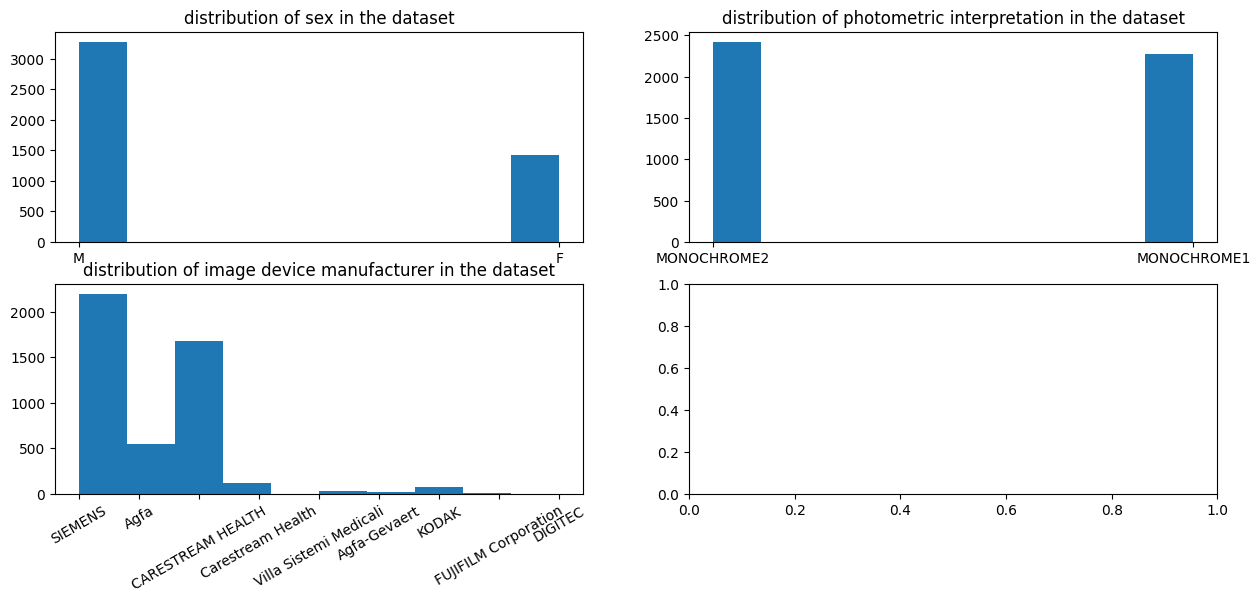

In [105]:
#categorical data
fig, axs = plt.subplots(2, 2, figsize=(15, 6))
axs = axs.flatten()
axs[0].hist(df_metadata['Sex'])
axs[0].set_title("distribution of sex in the dataset")

axs[2].hist(df_metadata['Manufacturer'])
axs[2].tick_params(axis="x", rotation=30)
axs[2].set_title("distribution of image device manufacturer in the dataset")

axs[1].hist(df_metadata['PhotometricInterpretation'])
axs[1].set_title("distribution of photometric interpretation in the dataset")

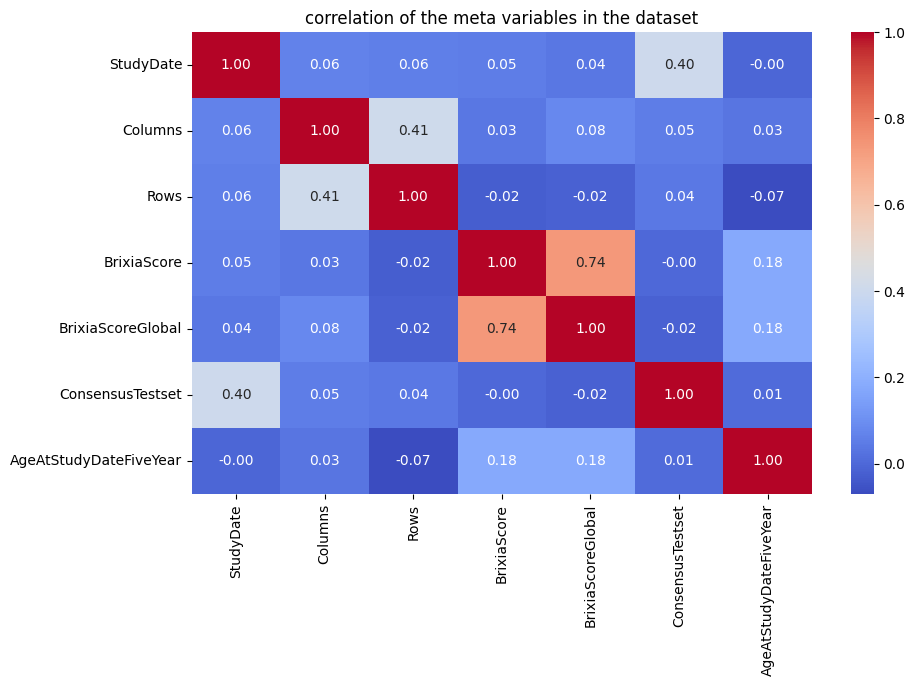

In [111]:
#correlation matrix -- of numerical metadata
corr_matrix = df_metadata.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('correlation of the meta variables in the dataset')
plt.show()